# HW2: Predicting Patient No-Shows

### Background

You've been hired as the manager of SHMC, a medical center in Brazil. As part of its business model, SHMC usually employs doctors on demand, meaning that doctors are asked to come only when there are appointments. However, once a doctor has been asked to come, you must pay him or her regardless of whether the patient shows up or not. You want to use data on previous appointments to figure out whether you can predict which patients are going to show up, so that you can plan better how many doctors to call.

[The data can be downloaded at this link.](https://drive.google.com/uc?download=export&id=1iM0CSzfNckc565zwpb4VpHjEVLgckLPE)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading the data

**1. Load the data referenced by the path above into a pandas data frame. Comment on the total number of rows and columns, and show the first few rows in the dataset.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


file_path = "/content/drive/My Drive/SHMC_NoShows.csv"

df = pd.read_csv(file_path)
print(f"Number of rows: {df.shape[0]}, Number of columns: {df.shape[1]}")
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Number of rows: 110527, Number of columns: 14


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Here's a brief summary of the features in the data:

1. PatientId - Identification of a patient.
2. AppointmentID - Identification of each appointment.
3. Gender - Male or female.
4. ScheduledDay - The day someone called or registered the appointment.
6. AppointmentDay - The day of the actual appointment, when the patient has to visit the doctor.
7. Age = How old is the patient.
8. Neighborhood - Place where the patient lives.
9. Scholarship - Whether the patient receives financial help.(0=No, 1=Yes)
10. Hypertension - Whether the patient suffers from hypertension.(0=No, 1=Yes)
11. Diabetes - Whether the patient suffers from diabetes.(0=No, 1=Yes)
12. Alcoholism - Whether the patient suffers from alcoholism.(0=No, 1=Yes)
13. Handicap - Whether the patient is handicapped (0=No, 1=Yes)
14. SMS_received - Whether 1 or more SMS messages were sent to the patient (0=No, 1=Yes)
15. No-show - Whether the patient missed the appointment.

### Exploratory Data Analysis

**2. Transform ScheduledDay and AppointmentDay into datetimes (Hint: Use pandas for this). What is the range of dates of the AppointmentDay?**

In [ ]:
# Tranforming ScheduledDay and AppointmentDay into datetimes
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# Finding the range of dates for 'AppointmentDay'
min_appointment_date = df['AppointmentDay'].min()
max_appointment_date = df['AppointmentDay'].max()
print(f"The range of dates for AppointmentDay is from {min_appointment_date} to {max_appointment_date}")

The range of dates for AppointmentDay is from 2016-04-29 00:00:00+00:00 to 2016-06-08 00:00:00+00:00


**3. If you take a look at both dates, you will see that ScheduledDay includes a specific time with the date, but AppointmentDay doesn't. In order to compare both fields more easily, apply "normalize" to ScheduledDay (i.e., keep only the dates). Hint: See the [normalize](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.dt.normalize.html) method.**

In [ ]:
df['ScheduledDay'] = df['ScheduledDay'].dt.normalize()
print(df['ScheduledDay'])

0        2016-04-29 00:00:00+00:00
1        2016-04-29 00:00:00+00:00
2        2016-04-29 00:00:00+00:00
3        2016-04-29 00:00:00+00:00
4        2016-04-29 00:00:00+00:00
                    ...           
110522   2016-05-03 00:00:00+00:00
110523   2016-05-03 00:00:00+00:00
110524   2016-04-27 00:00:00+00:00
110525   2016-04-27 00:00:00+00:00
110526   2016-04-27 00:00:00+00:00
Name: ScheduledDay, Length: 110527, dtype: datetime64[ns, UTC]


**4. Create a new feature called 'TimeInAdvance' which is the difference in days between ScheduledDay and AppointmentDay.  (you may need to apply `dt.days`  to a datetime object to make sure this is a numeric). What is the longest advance time that someone scheduled an appointment??**

In [ ]:
df['TimeInAdvance'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days
print(df['TimeInAdvance'].max())

179


**5. Explore the data set using EDA functions we have discussed in class.  Look at each feature.  Do any of them contain missing or weird values or outliers that concern you, given the feature descriptions above?  Comment on any weird values you see in any of the columns? Remove observations that contain any strange observations you have no explanation for, and report on how many rows were removed.**

In [ ]:
print(df.describe())
print(df.info())
print('Number of Missing Value')
print(df.isnull().sum())

# Investigating potential issues with each feature:
# Age
print(df['Age'].unique())  # Check for unusual ages.

# Remove patients with age less than 0
df = df[df['Age'] >= 0]
print(f"Removed patients with age < 0, remaining rows: {df.shape[0]}")

# Checking for outliers in 'TimeInAdvance'
print(df['TimeInAdvance'].describe())
print(df[df['TimeInAdvance'] > 365]) # Check the rows where the time in advance is greater than 1 year.


# Checking for inconsistencies in categorical variables
for col in ['Gender', 'Neighborhood', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show']:
    print(f"Unique values for {col}: {df[col].unique()}")


# Removing rows with 'TimeInAdvance' greater than 365 days.
initial_rows = df.shape[0]
df = df[df['TimeInAdvance'] >=0]
removed_rows = initial_rows - df.shape[0]

print(f"Removed {removed_rows} rows due to 'TimeInAdvance' > 365 days")


          PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.920000e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172615e+12   5.640286e+06      18.000000       0.000000   
50%    3.173180e+13   5.680573e+06      37.000000       0.000000   
75%    9.439170e+13   5.725524e+06      55.000000       0.000000   
max    9.999820e+14   5.790484e+06     115.000000       1.000000   

        Hypertension       Diabetes     Alcoholism       Handicap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       

1) Age:

min value for Age is -1, which is not a valid age. This indicates an error in the data and these rows should be removed.


2) TimeInAdvance:

min value for TimeInAdvance is -6. This implies that some appointments were scheduled after the appointment day, which doesn't make sense. These rows should be investigated and possibly removed. It is safe to remove negative values of TimeInAdvance as they are errors.

**6. Create a new column called "IsFemale" that is 1 if the patient is female and 0 otherwise. Also, drop the Gender column.**

In [ ]:
df['IsFemale'] = np.where(df['Gender'] == 'F', 1, 0)

df = df.drop('Gender', axis=1) # Droping gender column

**7. Do the same for the No-show variable. It should be 1 if the person didn't show and 0 otherwise.**

In [ ]:
df['NoShow'] = np.where(df['No-show'] == 'Yes', 1, 0)


df = df.drop('No-show', axis=1) # Droping the  'No-show' column


**8. Now we explore the `Neighborhood` feature.  It is a categorical with many levels (as can be seen from `value_counts`).  To simplify the analysis we are going to create a new verison of `Neighborhood` by re-labelling any neighborhoods that appear LESS THAN 2000 times and give them the label Neighborhood="OTHER".  Show a table of value_counts of your *new* Neighborhood feature.**

In [ ]:
neighborhood_counts = df['Neighborhood'].value_counts() # Counting occurrences of each neighborhood

neighborhoods_to_replace = neighborhood_counts[neighborhood_counts < 2000].index # Identified neighborhoods with less than 2000 occurrences


df['Neighborhood'] = df['Neighborhood'].replace(neighborhoods_to_replace, 'OTHER') # Replacing neighborhoods with less than 2000 occurrences with "OTHER"


print(df['Neighborhood'].value_counts()) # Displaying value counts of the new 'Neighborhood' feature


Neighborhood
OTHER                43878
JARDIM CAMBURI        7717
MARIA ORTIZ           5805
RESISTÊNCIA           4430
JARDIM DA PENHA       3877
ITARARÉ               3514
CENTRO                3334
TABUAZEIRO            3131
SANTA MARTHA          3131
JESUS DE NAZARETH     2853
BONFIM                2773
SANTO ANTÔNIO         2744
SANTO ANDRÉ           2571
CARATOÍRA             2565
JABOUR                2509
SÃO PEDRO             2448
ILHA DO PRÍNCIPE      2266
NOVA PALESTINA        2264
ANDORINHAS            2262
DA PENHA              2217
ROMÃO                 2214
GURIGICA              2018
Name: count, dtype: int64


**9. Create dummy variables for your new Neighborhood feature, add the dummies to your data frame, and then drop the original Neighborhood column from the data frame. Print a `head()` of your new data frame.**

In [ ]:
neighborhood_dummies = pd.get_dummies(df['Neighborhood'], prefix='Neighborhood', drop_first=True) #  dummy variables for 'Neighborhood' created

df = pd.concat([df, neighborhood_dummies], axis=1) # Concatenated dummy variables with the original DataFrame

df = df.drop('Neighborhood', axis=1) # Droping the original 'Neighborhood' column

print(df.head())

      PatientId  AppointmentID              ScheduledDay  \
0  2.987250e+13        5642903 2016-04-29 00:00:00+00:00   
1  5.589980e+14        5642503 2016-04-29 00:00:00+00:00   
2  4.262960e+12        5642549 2016-04-29 00:00:00+00:00   
3  8.679510e+11        5642828 2016-04-29 00:00:00+00:00   
4  8.841190e+12        5642494 2016-04-29 00:00:00+00:00   

             AppointmentDay  Age  Scholarship  Hypertension  Diabetes  \
0 2016-04-29 00:00:00+00:00   62            0             1         0   
1 2016-04-29 00:00:00+00:00   56            0             0         0   
2 2016-04-29 00:00:00+00:00   62            0             0         0   
3 2016-04-29 00:00:00+00:00    8            0             0         0   
4 2016-04-29 00:00:00+00:00   56            0             1         1   

   Alcoholism  Handicap  ...  Neighborhood_MARIA ORTIZ  \
0           0         0  ...                     False   
1           0         0  ...                     False   
2           0         0  .

**10. There are many patients that have made more than one appointment. This data set contains multiple observations per person, so we can use their past appointments as features in predicting whether the current appointment will be a no-show.**

**For example, the fact that a patient has failed to show up in the past may be predictive of the patient not showing up in the future. We want to create a variable that calculates the number of no_shows BEFORE the current appointment.**

**Create a new column called "PreviousNoShows" that for each appointment includes the number of *previous* appointments to which the patient did not show. For example, if the person did not show to the first meeting, PreviousNoShows should be 0 for the first appointment and 1 for the second one (if there is any). (We have provided sample code for this part below, but take a look at it to see if it makes sense to you, and edit to use your data frame name).**

**Now, create a line plot showing - for each value of PreviousNoShows, what is the percent No-Shows for the current appointment.  Does there seem to be a relationship? That is, does the number of PREVIOUS no-shows seem to be predictive of a no-show for the CURRENT appointment?  Comment.**

In [ ]:
## sample code for calculating PreviousNoShows- make sure to replace "df" with your data frame name

# df = df.sort_values(['PatientId', 'ScheduledDay'])
# df['PreviousNoShows'] = df.groupby(['PatientId'])['No-show'].cumsum()- noshows['No-show']


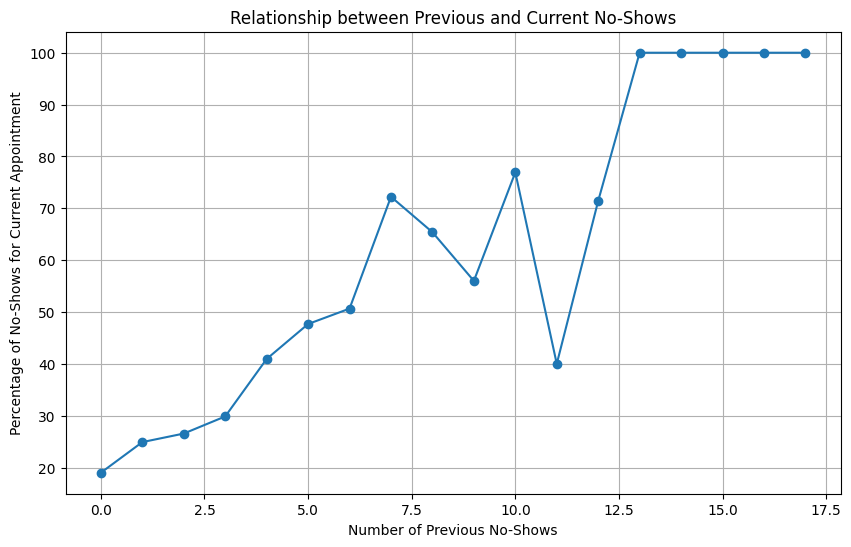

In [ ]:
# Sorting the DataFrame by PatientId and ScheduledDay
df = df.sort_values(['PatientId', 'ScheduledDay'])

# Calculated cumulative sum of NoShow for each patient
df['PreviousNoShows'] = df.groupby('PatientId')['NoShow'].cumsum() - df['NoShow']

# Ensuring 'PreviousNoShows' doesn't go below zero
df['PreviousNoShows'] = df['PreviousNoShows'].clip(lower=0)

# Group by 'PreviousNoShows' and calculate the mean of 'NoShow'
noshow_percentage = df.groupby('PreviousNoShows')['NoShow'].mean() * 100

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(noshow_percentage.index, noshow_percentage.values, marker='o')
plt.xlabel('Number of Previous No-Shows')
plt.ylabel('Percentage of No-Shows for Current Appointment')
plt.title('Relationship between Previous and Current No-Shows')
plt.grid(True)
plt.show()

The line plot shows a clear upward trend, indicating that as the number of previous no-shows increases, the likelihood of a no-show for the current appointment also increases. Patients with zero previous no-shows have a much lower probability of missing their appointment compared to those with multiple past no-shows.

- The probability of missing an appointment surpasses 80-90% for patients with more than 12 previous no-shows, showing a strong habitual pattern.

- The percentage of current no-shows rises as the count of previous no-shows increases, suggesting a strong correlation.

Yes, the number of past no-shows is a strong predictor of future no-shows. The increasing trend indicates that patients with a history of missing appointments are more likely to continue doing so.

### Predictive modeling using Trees

**11. Let's drop the columns we won't be needing. Drop PatientId, AppointmentID, ScheduledDay, AppointmentDay.**



In [ ]:
df = df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis=1)


**12. Build a model to predict No-Show using a DecisionTreeClassifier. First, split the data into training and test (80/20) - using `random_state=99`.  Using max_depth=3, fit the DecisionTreeClassifier to the training set and report the accuracy on the test set.**


In [ ]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score


In [ ]:

# Spliting data into training and testing sets
X = df.drop('NoShow', axis=1)
y = df['NoShow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

# Initializing and training the DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=99)
dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)

# Evaluating the model's accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy of the Decision Tree Classifier: {accuracy}")


Accuracy of the Decision Tree Classifier: 0.799819045464827


**13: Plot the tree.  What are the rules for the path that has the HIGHEST probability of NO-SHOW? Comment on these rules, do they make sense, are they intuitive?**

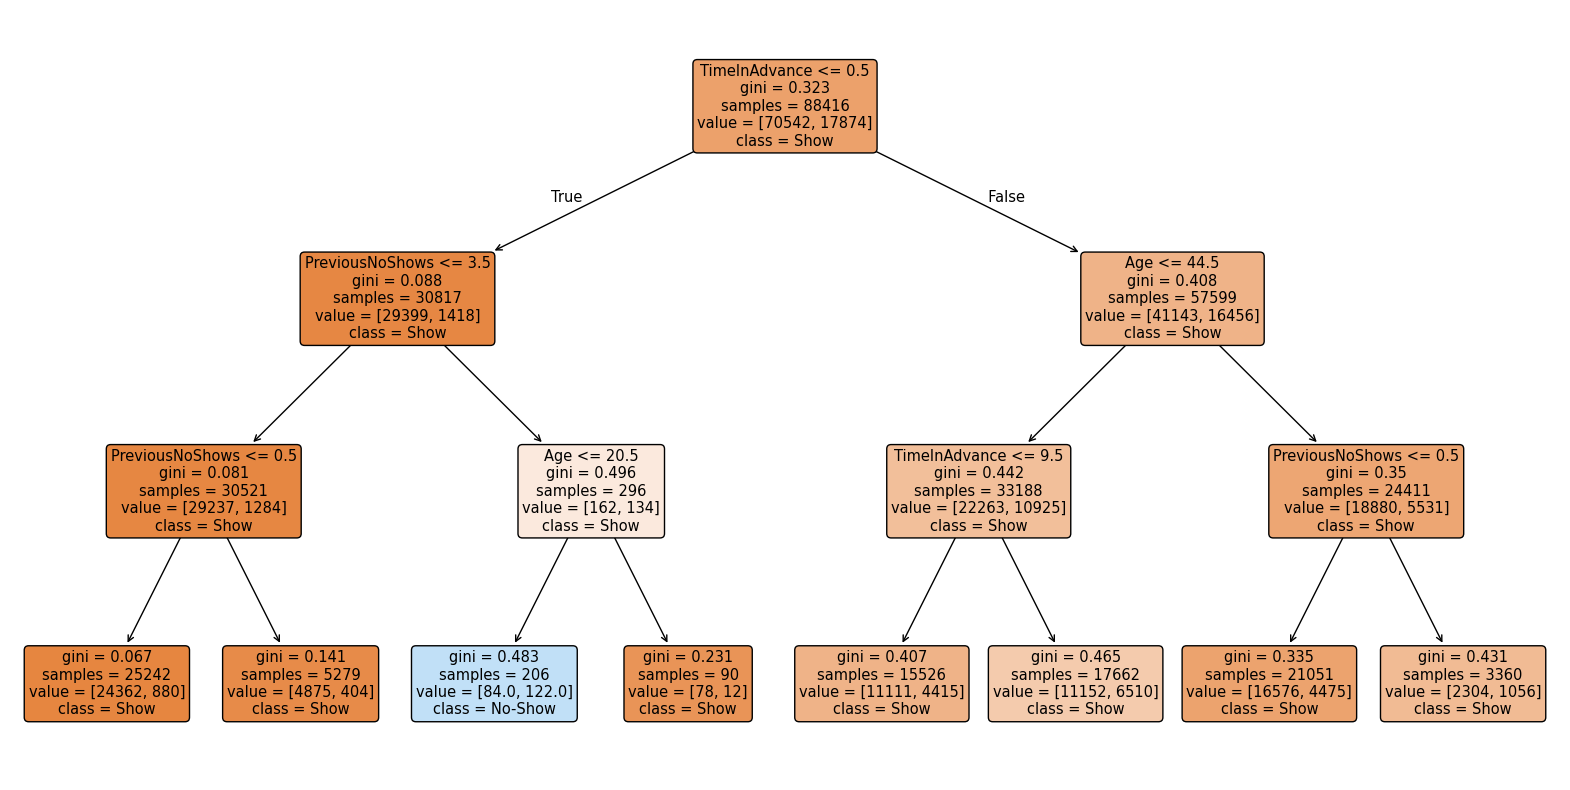

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(dt_classifier, feature_names=X.columns, class_names=['Show', 'No-Show'], filled=True, rounded=True)
plt.show()

Yes, the pattern is intuitive because:

- Last-Minute Booking (TimeInAdvance ≤ 0.5) → People who book at the last moment may be less committed or forget about their appointment.


- History of No-Shows (PreviousNoShows ≤ 3.5, then ≤ 0.5) → Even though this group has relatively fewer past no-shows, this specific subgroup still has a higher likelihood of missing.

- Young Age (Age ≤ 20.5) → Younger individuals might be less responsible or have unpredictable schedules, leading to more no-shows.


**14. Now we will calculate the optimal tree depth.**
- Create a for-loop that cycles over all `max_depth` values between 2 and 50
- in each iteration fit the model to the training set and calculate the F-measure on the test set (using `f1_score`) and store the F_measure in a list
- print out the f1_score at each iteration
- make a plot of max_depth vs. `f1_score`
- Select an optimal tree depth based on the plot (look for where the F-measure flattens out)

max_depth=2, f1_score=0.0
max_depth=3, f1_score=0.01557285873192436
max_depth=4, f1_score=0.01557285873192436
max_depth=5, f1_score=0.07924130663856692
max_depth=6, f1_score=0.08493723849372385
max_depth=7, f1_score=0.10403440507884497
max_depth=8, f1_score=0.10296220633299286
max_depth=9, f1_score=0.09877049180327868
max_depth=10, f1_score=0.11603545527800162
max_depth=11, f1_score=0.13133864387021565
max_depth=12, f1_score=0.12345679012345678
max_depth=13, f1_score=0.15119760479041916
max_depth=14, f1_score=0.16259864195265186
max_depth=15, f1_score=0.17308726034760796
max_depth=16, f1_score=0.19134631960006895
max_depth=17, f1_score=0.1993536315699949
max_depth=18, f1_score=0.21805624074987667
max_depth=19, f1_score=0.22316063017703427
max_depth=20, f1_score=0.2345348654179128
max_depth=21, f1_score=0.24766283524904215
max_depth=22, f1_score=0.2579589407914311
max_depth=23, f1_score=0.26627651792245793
max_depth=24, f1_score=0.2678878076702919
max_depth=25, f1_score=0.28219329825533

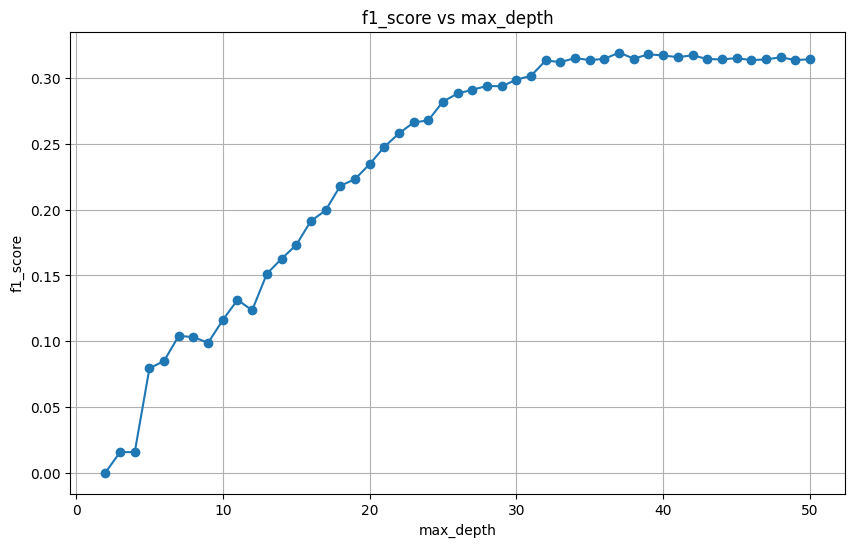

In [ ]:
f1_scores = []
for depth in range(2, 51):
    dt_classifier = DecisionTreeClassifier(max_depth=depth, random_state=99)
    dt_classifier.fit(X_train, y_train)
    y_pred = dt_classifier.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)
    print(f"max_depth={depth}, f1_score={f1}")
plt.figure(figsize=(10, 6))
plt.plot(range(2, 51), f1_scores, marker='o')
plt.xlabel("max_depth")
plt.ylabel("f1_score")
plt.title("f1_score vs max_depth")
plt.grid(True)
plt.show()

**15.  Fit the tree model (again) using the optimal depth and call this `final_model`.  Create the 2x2 confusion matrix using the predictions on the test set, vs the true values of the test set (make sure your confusion matrix is labelled). Calculate precision and recall (either directly from the 2x2 matrix, or by using the functions `precision_score` and `recall_score`)**

In [ ]:
optimal_depth = 37

# Fit the final model with the optimal depth
final_model = DecisionTreeClassifier(max_depth=optimal_depth, random_state=99)
final_model.fit(X_train, y_train)

y_pred_final = final_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_final)

print("Confusion Matrix:")
print(cm)

# Calculating precision and recall
precision = precision_score(y_test, y_pred_final)
recall = recall_score(y_test, y_pred_final)

print(f"Precision: {precision}")
print(f"Recall: {recall}")

Confusion Matrix:
[[15276  2389]
 [ 3142  1298]]
Precision: 0.3520477352861405
Recall: 0.29234234234234235


**16. Calculate the feature importance values for the features in `final_model`.  Comment on what the most important features are in estimating no-shows (and what isn't).  Are you surprised at what was and what was not important?  Comment on how you might you deal with this knowledge in making your office more efficient.**

In [ ]:
feature_importances = final_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
7,TimeInAdvance,0.326513
0,Age,0.282403
8,IsFemale,0.053150
22,Neighborhood_OTHER,0.030618
30,PreviousNoShows,0.024978
2,Hypertension,0.024912
6,SMS_received,0.024097
1,Scholarship,0.023767
3,Diabetes,0.013477
17,Neighborhood_JARDIM CAMBURI,0.012372


#Most Important Features:#

The most important features in predicting no-shows are:

- TimeInAdvance (0.327) – The amount of time in advance the appointment was scheduled.
Makes sense: If a patient books an appointment far in advance, they may be more likely to forget or deprioritize it.

- Age (0.282) – The patient’s age.
 Makes sense: Younger patients might be more likely to miss appointments due to busy schedules or lower health concerns.


- IsFemale (0.053) – Whether the patient is female.
Somewhat surprising: It’s unclear why gender plays a role, but there could be societal or healthcare utilization factors at play.


- Neighborhood_OTHER (0.031) – Catch-all for patients from neighborhoods not explicitly listed.
Makes sense: Distance or access to transportation may impact attendance.


#Least Important Features:#

- Alcoholism (0.007) and Handicap (0.009) – Medical conditions seem to have little predictive power.

- Many individual neighborhoods (~0.007 - 0.01) – The specific location of the patient is not as crucial as broader neighborhood groups.



#Unexpected:#

Surprising Findings
- Chronic conditions (Hypertension, Diabetes) are not as important.

 Expectation: Patients with chronic illnesses should be more likely to show up since they need ongoing medical care.

 Reality: These conditions have low feature importance, suggesting that medical necessity alone does not drive attendance.

 Possible explanation: Patients with chronic conditions might be more familiar with the healthcare system and more prone to rescheduling or managing their own care.

- Gender (IsFemale) plays a major role in prediction

 Expectation: Gender shouldn’t be a major predictor.

 Reality: Being female is more predictive (0.053) than chronic diseases (Hypertension: 0.025, Diabetes: 0.013)

 Possible explanation: This could be due to social and economic factors—for example, women might be balancing caregiving responsibilities or have more flexible schedules. This finding warrants further investigation.

**17. The F_measure above was calculated using a threshold of 0.5 (this is the default in the tree fitting function).  As we discussed in class, changing the threshold will have an effect on precision and recall.  Plot a histogram of the predicted probabilities that come out of your final model (using `.predict_proba() )`.  Using what you learn from the histogram, select a different threshold for labelling a patient as a No-show. Calculate precision, recall, and F-measure for your threshold and compare it to the default threshold of 0.5.  Comment on the tradeoff between the two thresholds, what are the pros and cons?  Which threshold would you choose?**

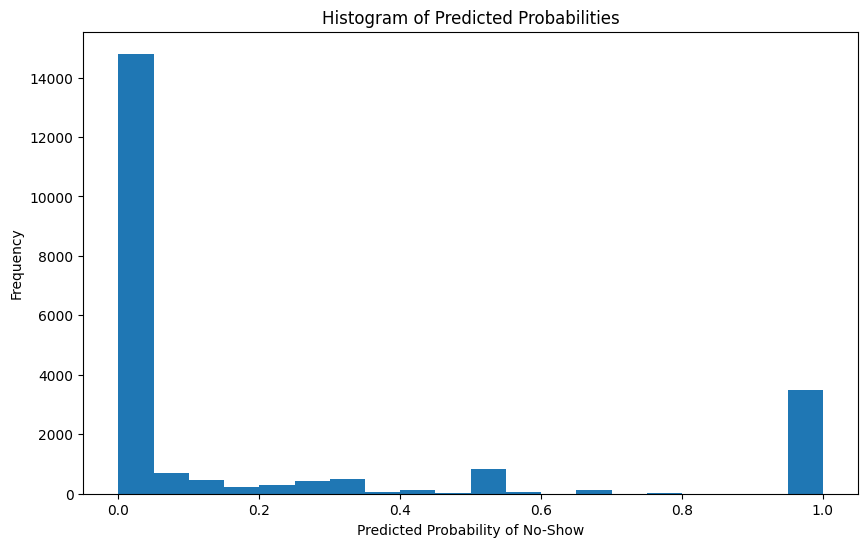

Results for threshold = 0.3:
Precision: 0.3151051625239006
Recall: 0.37117117117117115
F1-score: 0.3408479834539814

Results for threshold = 0.5 (default):
Precision: 0.3520477352861405
Recall: 0.29234234234234235
F1-score: 0.3143101551998045


In [ ]:
# Predict probabilities for the test set
y_pred_prob = final_model.predict_proba(X_test)[:, 1]

# Plot the histogram of predicted probabilities
plt.figure(figsize=(10, 6))
plt.hist(y_pred_prob, bins=20)
plt.xlabel("Predicted Probability of No-Show")
plt.ylabel("Frequency")
plt.title("Histogram of Predicted Probabilities")
plt.show()

# Example: Choosing a new threshold based on the histogram (adjust based on your histogram)
new_threshold = 0.3
# Predict classes based on the new threshold
y_pred_new_threshold = (y_pred_prob >= new_threshold).astype(int)

# Calculate precision, recall, and F1-score for the new threshold
precision_new = precision_score(y_test, y_pred_new_threshold)
recall_new = recall_score(y_test, y_pred_new_threshold)
f1_new = f1_score(y_test, y_pred_new_threshold)

print(f"Results for threshold = {new_threshold}:")
print(f"Precision: {precision_new}")
print(f"Recall: {recall_new}")
print(f"F1-score: {f1_new}")

# Compare with the default threshold (0.5) results
print("\nResults for threshold = 0.5 (default):")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

###Lowering the threshold (0.3):
Recall increased: more actual no-shows were correctly identified.

Precision decreased: more patients were incorrectly classified as no-shows.

F1-score slightly improved, suggesting a better balance between precision and recall.

#Tradeoff Between the Two

###Threshold = 0.5 (Default)

Pro: Fewer false positives (patients wrongly classified as no-shows).

Con: More false negatives (missed actual no-shows), meaning wasted time and resources for scheduled but absent patients.

###Threshold = 0.3
Pro: Captures more actual no-shows, leading to better resource allocation (e.g., overbooking or sending extra reminders).

Con: Higher false positives, which might lead to unnecessary follow-ups or cancellations of valid appointments.

#Which Threshold is Better?

If the goal is to minimize patient no-shows (e.g., by sending reminders or overbooking based on prediction), 0.3 is better since recall is higher.

If the goal is to avoid falsely labeling reliable patients as no-shows, then 0.5 is better since it has higher precision.

Given the slight F1-score improvement at 0.3, I would choose 0.3 if no-shows are costly and extra reminders or interventions are feasible.